# Ecuaciones diferenciales ordinarias

In [3]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
using Interact

Recordemos qué una **ecuación diferencial ordinaria (EDO)** es (aproximadamente) una ecuación en la cual aparece una derivada de una función, y para la cual queremos buscar la solución para esta función.

La EDO más simple no-trivial y físicamente relevante en una variable es 

$$\dot{x} = -\alpha x.$$

[Recordemos la notación $\dot{x} := \textstyle \frac{dx}{dt}$, donde $t$ es el tiempo; es muy común en la física que las EDOs involucren derivadas con respecto al tiempo.]

Una solución a esta ecuación es un objeto $x$, tal que cuando la derivamos con respecto al tiempo, nos da $-\alpha$ (una constante) multiplicada por el mismo objeto. Implícitamente está claro que $x$ depende de $t$, por lo que realmente $x$ se refiere a una función de $t$, es decir $x: \mathbb{R} \to \mathbb{R}$, con $x: t \mapsto x(t)$. Esta ecuación se puede considerar como ecuación *funcional*, es decir, una igualdad de funciones. 

Esta ecuación se puede escribir más explícitamente como sigue:

$$\dot{x}(t) = -\alpha x(t) \qquad \text{para cada } t \in \mathbb{R}.$$

En mi opinión, en esta forma queda más claro.

Esto quiere decir que si *de alguna manera* hayamos logrado saber que la solución en el tiempo $t$ está en la posición $x(t)$, entonces nos indica cuál será la *velocidad* $\dot{x}(t)$ en este momento. 

La forma general de una EDO en una variable es

$$\dot{x} = f(x, t),$$

o sea

$$\dot{x}(t) = f(x(t), t) \qquad \text{para cada } t \in \mathbb{R}.$$

Recordemos que debe ir acompañada por una condición inicial $x(t=t_0) = x_0$ para que constituya un problema bien posado (*problema de valores iniciales*, o *problema de Cauchy*).
La solución de una ecuación de este tipo será una *función* $x(t)$ que satisface al mismo tiempo que $\dot{x}(t) = f(x(t), t)$ para cada $t$, y que $x(t=t_0) = x_0$. 

En el caso particular de la ecuación $\dot{x} = -\alpha x$, conocemos analíticamente la solución, y nos servirá para comprobar nuestros métodos. Pero para las ecuaciones de interés para la física, esto *casi nunca ocurre*, una situación que ¡suele pasar desapercibida durante la carrera! En estos casos, debemos aplicar distintas técnicas de *aproximación* de la solución, entre las cuales se destacan los *métodos numéricos*.

# Método de Euler

Para resolver una EDO numéricamente en la computadora, tendremos que *aproximar* la solución continua $x: t \mapsto x(t)$ con una versión con una cantidad finita de información, es decir, *discretizarla* de alguna forma.

La manera más sencilla de hacerla es usando *diferencias finitas*.

**[1]** (i) ¿Cuál es la aproximación más sencilla de la derivada $\dot{x}(t)$, en términos de un tamaño de paso pequeño $h$?

$\dot{x}(t) = \frac{x(t + h) - x(t)}{h}$

(ii) Aplica esta aproximación con la ecuación $\dot{x} = f(x, t)$ para obtener una expresión para $x(t+h)$, es decir el valor *predicho* en el siguiente *paso* de tiempo, en términos del valor ya conocido $x(t)$.

$x(t + h) = h * f(x(t), t) + x(t)$

(iii) Implementa este *método de Euler* en una función. Para hacerlo, crea un arreglo `ts` de los tiempos en los cuales se evaluará la función. Luego crea otro arreglo de ceros, con la función `zeros`. [Si pasas el arreglo `t` como argumento a esta función, creará un arreglo del mismo tamaño automáticamente.] Ahora implementa el paso (ii) en un algoritmo iterativo para actualizar los valores en el nuevo arreglo para cada tiempo sucesivamente.

In [4]:
function Euler(f::Function, x0::Real, t0::Real, tf::Real, h::Real)
   
    # Condiciones iniciales
    #f = f(x0, t0)
   
     # Arreglos con condiciones iniciales
    Xs = Float64[x0]
    Ts = collect(t0:h:tf) # Arreglo que contiene los tiempos
    
    for i in 1:length(Ts)-1
    
        x = h * f(Xs[i], Ts[i]) + Xs[i]
        push!(Xs, x)

    end
    
    return Ts, Xs
    
end

Euler (generic function with 1 method)

(iv) Verifica que funcione tu método al aplicarlo a una función $f(t)$ sencilla que dependa *únicamente del tiempo*. [Recuerda que debes imponer una condición inicial.] ¿Cuál operación matemática acabas de llevar a cabo? Compara con la solución analítica.

In [5]:
f(x,t) = x

f (generic function with 1 method)

In [6]:
a, b = Euler(f, 1.0, 0.0, 10, 0.01)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],[1.0,1.01,1.0201,1.0303,1.0406,1.05101,1.06152,1.07214,1.08286,1.09369  …  19163.8,19355.4,19549.0,19744.5,19941.9,20141.3,20342.7,20546.2,20751.6,20959.2])


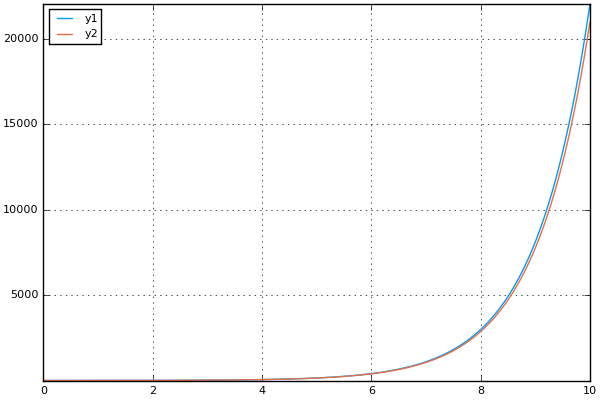

In [7]:
#Euler(f, 1, 0, 10, 0.01)
plot(a, exp)
plot!(a, b)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.55, nactions=1),"h",2.55,"2.55",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.11"=>0.11,"0.12"=>0.12,"0.13"=>0.13,"0.14"=>0.14,"0.15"=>0.15,"0.16"=>0.16,"0.17"=>0.17,"0.18"=>0.18,"0.19"=>0.19…),Dict(1.2=>"1.2",2.37=>"2.37",1.68=>"1.68",4.92=>"4.92",1.19=>"1.19",0.22=>"0.22",2.75=>"2.75",4.83=>"4.83",0.2=>"0.2",0.89=>"0.89"…)),Any[],Any[],true,"horizontal")


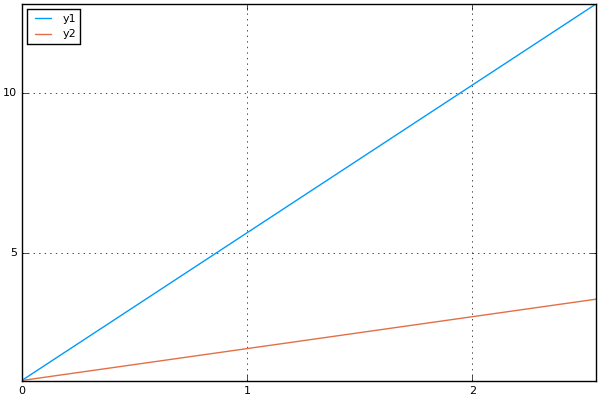

In [9]:
@manipulate for h in 0.1:0.01:5
    c, d = Euler(f, 1.0, 0.0, 5.0, h)
    plot(c, exp)
    plot!(c, d)
end

**[2]** (i) Utiliza tu función para resolver la ecuación $\dot{x} = -\alpha x$, con  y compara tu solución numérica gráficamente con la solución analítica de la ecuación. ¿Qué pasa al variar el paso de tiempo? Hazlo interactivo.

(ii) Dado que el método de Euler utiliza una aproximación, el resultado no es exacto. Fija una $t$ final y calcula el error (desde la solución analítica) en función del tamaño de paso $h$. ¿Cómo es la convergencia en función de $h$?

$x = e^{-\alpha  t}$

In [20]:
f(x,t) = -α(x) 

f (generic function with 1 method)

In [21]:
ts = 0
x = 1
α = 1
f(1, 0)  

LoadError: MethodError: objects of type Int64 are not callable

In [11]:
a1, a2 = Euler(f, 1.0, 0.0, 5.0, 0.2)

([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8  …  3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0],[1.0,1.2,1.44,1.728,2.0736,2.48832,2.98598,3.58318,4.29982,5.15978  …  18.4884,22.1861,26.6233,31.948,38.3376,46.0051,55.2061,66.2474,79.4968,95.3962])

In [12]:
# Gráfica
plot(a1, f)
plot!(a1, a2)

LoadError: MethodError: no method matching f(::Float64)[0m
Closest candidates are:
  f(::Any, [1m[31m::Any[0m) at In[10]:1[0m

**[3]** Considera la ecuación diferencial nolineal $\dot{x} = x*(1-x)$ que modela la dinámica de una población. Resúelvela numéricamente desde distintas condiciones iniciales y dibuja las soluciones correspondientes. Interpreta el resultado.

# Varias variables

El método de Euler se extiende directamente a EDOs con más de una variable.

**[4]** (i) Deriva un método de Euler para las ecuaciones acopladas
$$\dot{x} = f(x, y);$$
$$\dot{y} = g(x, y).$$

Para hacerlo, aplica la definición de la derivada de nuevo.

(ii) Implementa el método.

(iii) Aplícalo a la ecuación diferencial lineal que describe un oscilador armónico amortiguado. [Pista: Recuerda que para hacerlo, hay un "truco" para reducir una ecuación diferencial de segundo orden a dos ecuaciones de primer orden; ¿cuál es?

(iv) Calcula trayectorias desde distintas condiciones iniciales y dibújalas, y/o ¡hazlo interactivo!
Debes dibujar tanto $x(t)$ y $y(t)$ como funciones del tiempo, como el **espacio fase**. 

## El enfoque vectorial

Recordemos que *cualquier* EDO, *incluídas las de orden superior* (es decir, con derivadas más altas que la primera de alguna función) se puede escribir en la forma
$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, t) \qquad (*)$$

es decir

$$\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t), t),$$

donde ahora $\mathbf{x} = (x_1, \ldots, x_n) \in \mathbb{R}^n$ es un vector y $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$ es una función vectorial, que nos da un **campo vectorial** que indica en cuál dirección seguir desde cada punto del espacio.

**[5]** (i) Escribe una función para hacer un paso del método de Euler para las ecuaciones acopladas

$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, t).$$

El código ahora deberá ser *genérico*, es decir, debe funcionar para cualquier función $\mathbf{f}$ y vector $\mathbf{x}$.

(ii) Escribe el método de Euler completo. 

(iii) Úsalo para resolver la caída libre y una caída con fricción lineal en la velocidad. Compara con el resultado exacto. Dibuja las resultados con distintos tamaños de fricción.

(iv) Resuelve la caída libre con fricción cuadrática en la velocidad.

**[6]** (i) Resuelve numéricamente el problema del tiro parabólico con Euler para un proyectil que empieza en una altura $h>0$ con rapidez $1$ y ángulo inicial $\alpha$, *hasta que* caiga al suelo.

(ii) Encuentra la distancia horizontal donde cae al suelo (el rango). Dibuja el resultado tal que puedas manipular interactivamente las condiciones iniciales. Encuentra numéricamente el ángulo que maximiza el rango. ¿Es correcto?

(iii) Agrega fricción del aire al problema y agrégalo como otro parámetro que puedas manipular. ¿Cómo cambia el resultado de la pregunta (ii)?